In [1]:
import cv2
from PIL import Image
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

In [2]:
# define device id & model path
device_id = 0
model_path = "model/openpose_no_aipp.om"

# define image
img_path = "../../Common/data/friends.jpg"

In [3]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 860016
Create model output dataset success
Init model resource success


In [4]:
# read image
img_org_bgr = cv2.imread(img_path)

In [5]:
# 1) pre-processing stage
data, pad = preprocessing(img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'image', 'dimCount': 4, 'dims': [1, 368, 656, 3]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Openpose/concat_stage7:0', 'dimCount': 4, 'dims': [1, 46, 82, 57]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [6]:
%timeit -n 10 -r 3
# 2) model execution(forward) stage
result_list = model.execute([data,])

In [7]:
# 3) post-processing the raw predictions
canvas = postprocessing(result_list[0],img_org_bgr,data,pad)

In [8]:
img = Image.fromarray(canvas[:,:,::-1])

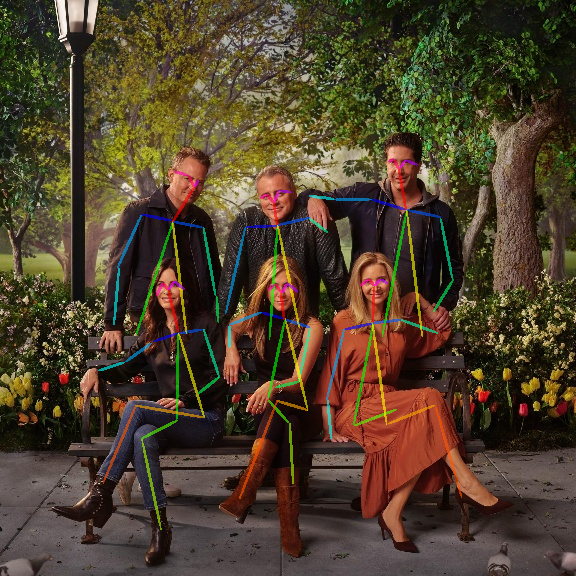

In [9]:
img